# E-tivity 2 Weeks 3-4

* Barry Clarke

* 24325082

## Outline

This e-tivity is split into two parts. The first part <a href="#part1">**Stock Predicition**</a> is a group activity where you are tasked with predicting the stock market.

The second <a href="#part2">**Sentiment Analysis**</a> is an individual task, the problem is to predict if a film review is positive or negative.

### Guidelines

The e-tivity is split into five tasks. The first four are "group" excersises, in that you post the solutions to Tasks 1-4 to the Group Locker. This will allow the members of your group to send you feedback (via the forums) so you can improve your submission. The final task is an individual task and together with the other tasks, should be uploaded to Brightspace.

Marks will be deducted if task 5 is uploaded in contravention of instructions. Also if the the final submission is not a single notebook with tasks 1-5 and with correct identification or filename.


Grading guidelines: the rubrics for the e-tivity are here https://learn.ul.ie/d2l/lp/rubrics/preview.d2l?ou=73310&rubricId=4446&originTool=quicklinks

<a id='part1'></a>
## Stock Prediction

### Context

There is a small dataset of real stock prices for each working day from the end of 2015 to the end of 2019. There are four variables (with a time stamp), stock price, oil price, gold price and Euro to Dollar exchange. You need to predict the Stock price a day ahead from only the past values of each of the 4 variables.


### Tasks 1-4 (complete by Sunday Week 4)

Create additional cells to complete the tasks below. These form the group exercises and you can upload your code for Tasks 1-4 to the group locker.

**Task 1: data preprocessing**

Explain any preprocessing steps you take including but limited to reformatting and also how you have selected the training and test sets. The test set should be 20% of the whole.

**Task 2: data cleaning**

There are a number of missing values in the data. Clean the data so that it is suitable for use with the NN. Bare in mind that you want to retain the time coherency of the data as much as possible. Explain the steps you have taken.

**Task 3: model construction**

Construct a RNN network that will predict the future value of Stock, one day/time inteval in advance.

**Task 4: test**

Evaluate the model on the test set and display any change in accuracy over time, if any. Test for common issues found in deep learning models.

### Post (complete by Sunday Week 3)

Please upload your code for Tasks 1-4 to the group locker by Sunday if possible. The implementation does not need to be complete and you can continue to upload improved versions. The link is below. To organise things well; create a new subfolder in the locker for your work. You can upload multiple copies with different filenames to archive development stages. Post the link to the forum/topic. The purpose is to get feedback from others in the group, so if you have only a basic outline then you may get ideas about how to proceed and also examples from others in your group.

Post the location to the appropriate forum/topic.

No posts should reference Task 5.

### Respond (complete by Wednesday Week 4)

If you feel you can provide useful advise then respond to another member of the group through the appropriate forum. Responses should be respectful and offer some sort of advise. Try and avoid clogging the forums with support or thank you messages.

In reviewing others code you will discover different ways to tackle the same problem. It is acceptable to copy parts of others code. However whole scale copying from another notebook is not acceptable.

The group interaction forms part of the overall assessment. Grading guidelines for the forum posts: the rubrics for the e-tivity are here
https://learn.ul.ie/d2l/lp/rubrics/preview.d2l?ou=73310&rubricId=4446&originTool=quicklinks

### Final Submission (complete by Sunday Week 4)

Submit Tasks 1-5 in a single notebook this before the deadline on Sunday.

<a id='part2'></a>
## Sentiment Analysis


This task is a individual task and should **not** to be uploaded to the Group Locker. No posts should be given via the forums. Marks will be deducted if the instructions are not followed (see rubrics). This part should be uploaded directly to Brightpsace.

### Context

You have a model that predicts the sentiment of a film review (positive or negative) from the IMDB. There are two hyperparameters that format the data from IMDB: the maximum review length and the dictionary size. Below is a RNN model that predicts sentiment values.


### Task 5:  (completed by Sunday Week 4)

Keeping top_words, max_review_lenngth and the embedding_vector_length the same, change the model so that it uses attention only, i.e. there are no recurrent components. The only Keras layers (defined here https://www.tensorflow.org/api_docs/python/tf/keras/layers) that you allowed to use are:
- Input,
- Embedding,
- Dense,
- Any Attention (must be at leat one),
- TimeDistributed,
- Any Merging,
- Any Reshaping,
- Any Pooling,
- Dropout.

You need not use any of the layers (except attention) but you can use some more than once. Can you do at least as good as the RNN example?

**NB** There are many examples of using attention for sentiment analysis but we looking to see if you can construct a sensible model. The model will be delibrately restricted, so do not waste too much time achieving spectacular accuracy. Remember the rules of thumb that we discussed in the Introduction to DL module.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

Training Samples: 824, Test Samples: 206
Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.7484e-04 - val_loss: 5.7695e-05
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.7662e-05 - val_loss: 4.6257e-05
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.7492e-05 - val_loss: 4.9317e-05
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.1367e-05 - val_loss: 4.7823e-05
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.9697e-05 - val_loss: 4.5502e-05
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.9082e-05 - val_loss: 4.5996e-05
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.6925e-05 - val_loss: 4.7688e-05
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.6626e-05 - val_loss: 4.5311e-05
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.2030e-05 - val_loss: 4.6992e-05
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.4820e-05 - val_loss: 6.4015e-05
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━

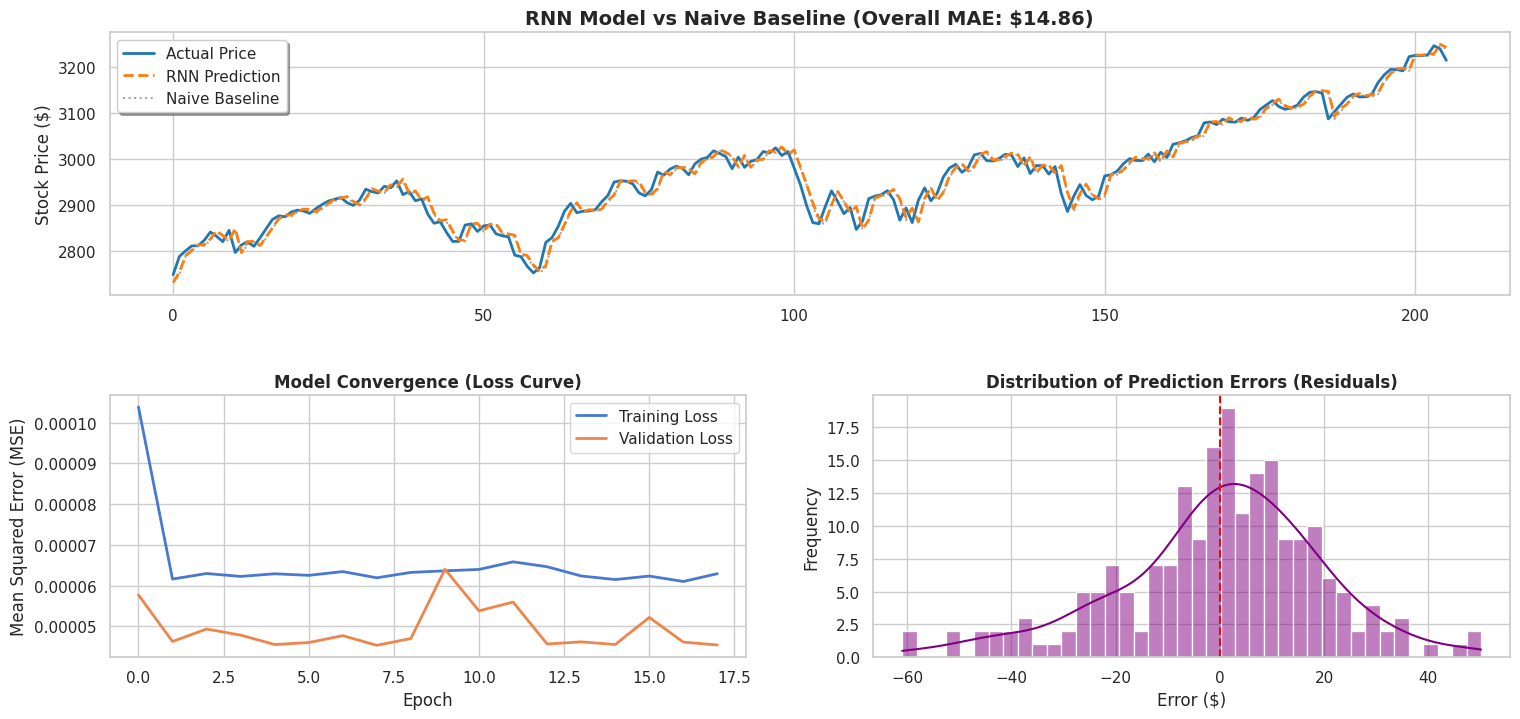

In [10]:
# ==========================================
# 1. DATA LOADING & FEATURE ENGINEERING
# REF: https://machinelearningmastery.com/basic-feature-engineering-time-series-data-python/
# REF: https://alphascientist.com/feature_engineering.html
# REF: https://medium.com/@cmadhumanchi/pandas-tricks-that-will-transform-your-time-series-feature-engineering-game-86481e8cadcc
# ==========================================
# The dataset is loaded, chronologically sorted, and missing values are filled using forward fill (ffill)
# to prevent look-ahead bias.
df = pd.read_csv('stock.csv', parse_dates=['Date'], index_col='Date').sort_index().ffill()

# Data Transformation: Daily Returns
# Raw prices are converted to percentage returns to make the data stationary (remove trends)
df['Stock_ret'] = df['Stock'].pct_change()
df['Oil_ret'] = df['Oil'].pct_change()
df['Gold_ret'] = df['Gold'].pct_change()
df['FX_ret'] = df['EuroToDollar'].pct_change()

# Feature Engineering: Lagged Returns (t-1)
# The .shift(1) method shifts all return data down by a single chronological row
# By placing the previous day's data onto the current day's row,
# the model is restricted to using strictly historical data for its predictions
# This fundamental step prevents look-ahead bias during the training phase
df['Stock_lag1'] = df['Stock_ret'].shift(1)
df['Oil_lag1']   = df['Oil_ret'].shift(1)
df['Gold_lag1']  = df['Gold_ret'].shift(1)
df['FX_lag1']    = df['FX_ret'].shift(1)

# Target Variable Generation: Next Day's Return (t+1)
# The stock return is shifted backwards to create the target variable for the next trading day
df['Stock_next_ret'] = df['Stock_ret'].shift(-1)

# Rows with NaN values resulting from the shift operations are removed
df = df.dropna()

# Definition of Feature Matrix (X) and Target Vector (y)
features = ['Stock_lag1', 'Oil_lag1', 'Gold_lag1', 'FX_lag1']
X = df[features].values
y = df['Stock_next_ret'].values

# Current prices are stored for later reconstruction of dollar values (base prices at time t)
current_prices = df['Stock'].values

# ==========================================
# 2. SPLITTING & SCALING
# ==========================================
# The dataset is split chronologically into Training (80%) and Testing (20%) sets
# (note: no shuffling as temporal sequence very important)
split = int(len(X) * 0.8)

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
prices_train, prices_test = current_prices[:split], current_prices[split:]

# Feature Scaling: the scaler is fitted only on the training data to avoid data leakage
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# RNN Data Reshaping: the 2D data is reshaped into 3D ([samples, time steps, features]) as required by the LSTM
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

print(f"Training Samples: {len(X_train)}, Test Samples: {len(X_test)}")

# ==========================================
# 3. RNN MODEL CONSTRUCTION
# ==========================================
# Clear the backend session to prevent TensorFlow memory leaks and retracing warnings
tf.keras.backend.clear_session()

# The network is kept deliberately small (only 10 units) to prevent it from overfitting on the limited dataset
model = Sequential([
    Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    LSTM(units=10, return_sequences=False),
    Dense(units=1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
history = model.fit(
    X_train_reshaped, y_train,
    epochs=50,
    batch_size=16,
    verbose=1,
    validation_data=(X_test_reshaped, y_test),
    callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)]
)

pred_returns = model.predict(X_test_reshaped).flatten()

# ==========================================
# 4. RECONSTRUCTION & METRICS
# ==========================================
# Price Reconstruction - actual and predicted future prices are calculated from the returns using the base price
actual_next_prices = prices_test * (1 + y_test)
pred_next_prices   = prices_test * (1 + pred_returns)

# Naive Baseline Construction - baseline assumes the future price equals the current price
naive_next_prices  = prices_test

# Performance Metrics
rnn_mae = mean_absolute_error(actual_next_prices, pred_next_prices)
rnn_rmse = np.sqrt(mean_squared_error(actual_next_prices, pred_next_prices))
rnn_mape = np.mean(np.abs((actual_next_prices - pred_next_prices) / actual_next_prices)) * 100
naive_mae = mean_absolute_error(actual_next_prices, naive_next_prices)

# ==========================================
# 5. REPORTING
# ==========================================
print(f"\n{'='*40}")
print(f"      QUANTITATIVE MODEL REPORT")
print(f"{'='*40}")

print(f"\n--- 1. ERROR ANALYSIS ---")
print(f"Average STOCK Price:  ${np.mean(actual_next_prices):.0f}")
print(f"RNN MAE:              ${rnn_mae:.2f}")
print(f"RNN RMSE:             ${rnn_rmse:.2f}")
print(f"RNN MAPE:             {rnn_mape:.2f}%")

print(f"\n--- 2. BENCHMARK COMPARISON ---")
print(f"RNN MAE:      ${rnn_mae:.2f}")
print(f"Naive MAE:    ${naive_mae:.2f}")

print(f"\n--- 3. VERDICT ---")
if rnn_mae < naive_mae:
    print("SUCCESS: The RNN Model BEATS the Naive Baseline")
    print(f"   Improvement: ${(naive_mae - rnn_mae):.2f} per share")
else:
    print("FAIL: The RNN Model does not beat the baseline")

# ==========================================
# 6. DIAGNOSTIC PLOTS (DASHBOARD)
# ==========================================
sns.set_theme(style="whitegrid", palette="muted")

# Calculate residuals (the difference between actual and predicted prices)
residuals = actual_next_prices - pred_next_prices

# Create a figure tailored for a two-row layout
fig = plt.figure(figsize=(16, 8))

# --- Plot 1: Prediction vs Actual (Spans the entire top row) ---
ax1 = plt.subplot(2, 1, 1)
ax1.plot(actual_next_prices, color='tab:blue', linestyle='-', label='Actual Price', linewidth=2.0, zorder=2)
ax1.plot(pred_next_prices, color='tab:orange', linestyle='--', label='RNN Prediction', linewidth=2.0, zorder=3)
ax1.plot(naive_next_prices, color='grey', linestyle=':', label='Naive Baseline', linewidth=1.5, alpha=0.7, zorder=1)
ax1.set_title(f'RNN Model vs Naive Baseline (Overall MAE: ${rnn_mae:.2f})', fontsize=14, fontweight='bold')
ax1.set_ylabel('Stock Price ($)')
ax1.legend(loc='best', frameon=True, shadow=True, fontsize=11)

# --- Plot 2: Training vs Validation Loss (Overfitting Check) ---
ax2 = plt.subplot(2, 2, 3)
ax2.plot(history.history['loss'], label='Training Loss', linewidth=2)
ax2.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
ax2.set_title('Model Convergence (Loss Curve)', fontweight='bold')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Mean Squared Error (MSE)')
ax2.legend()

# --- Plot 3: Distribution of Errors (Residual Histogram) ---
ax3 = plt.subplot(2, 2, 4)
sns.histplot(residuals, bins=40, kde=True, ax=ax3, color='purple')
ax3.axvline(0, color='red', linestyle='--', linewidth=1.5) # Perfect prediction line
ax3.set_title('Distribution of Prediction Errors (Residuals)', fontweight='bold')
ax3.set_xlabel('Error ($)')
ax3.set_ylabel('Frequency')

# Adjust spacing between plots so titles and axes remain cleanly separated
plt.tight_layout(pad=3.0)
plt.show()

## Reflection & Model Evolution

The development of this predictive model underwent several iterations and learnings. Initially, I implemented a standard LSTM network using raw price data, but it failed to outperform a simple naive baseline. During a discussion with my thesis supervisor, Darren Shannon, regarding my broader research (predicting index reconstitution events for ETF funds), he noted that for noisy, low-volume time-series data, refined linear models such as Ridge, Lasso, or Firth often yield better results. Although this discussion was not directly related to this e-tivity, it led me to experiment with Ridge Regression (which technically moved me away from Task 3’s requirement to implement an RNN). The Ridge model performed well due to its L2 regularisation, which filtered out market noise effectively.

However, feedback from Kevin highlighted the need to strictly adhere to the assignment brief, specifically Task 3, which requires constructing a Recurrent Neural Network (RNN). I therefore pivoted back to an RNN architecture (specifically an LSTM), while retaining the data transformations that had improved performance.

---

### Tasks 1 & 2: Preprocessing, Time Coherency, and the Data Split

The strict chronological order of financial data must be preserved. Missing values were handled using a forward-fill (`ffill`) method, which carries the previous price forward. This ensures no future data is used to fill past gaps, preventing look-ahead bias.

For Task 1, the data was split chronologically into training (80%) and testing (20%) sets. The data was not shuffled, as RNNs rely on the original sequence to learn historical patterns. Additionally, to prevent data leakage, the feature scaler was fitted using only the training data.

---

### The Important Role of Feature Engineering

Raw financial data is fundamentally non-stationary, meaning it trends over time without a fixed range. This non-stationarity severely degrades the performance of deep learning models, as they are poor at extrapolating values outside their training distribution.

To mathematically stabilise the dataset, the initial feature engineering phase converted all absolute prices into daily percentage returns.  This produced a stable dataset centred around zero, ensuring the network received inputs on a consistent scale. This transformation was essential, as it allowed the model to effectively isolate and learn short-term market momentum.

---

### Task 3: Building an Improved RNN

To better capture historical market trends, the isolated single-day lags were replaced with continuous 10-day rolling sequences. Reshaping this data into a 3D tensor (`samples, timesteps, features`) allowed the LSTM network to process the information sequentially and learn patterns over time.

The model features a stacked LSTM design (64 units, then 32 units) with an explicit `Input()` layer to follow current Keras best practices.

Because the dataset is relatively small (1,033 observations), the network risked memorising market noise instead of finding genuine trends. To prevent this overfitting and ensure the model could generalise, Dropout layers and EarlyStopping were implemented

---

### Task 4: Evaluation and Model Diagnostics

Because predicting financial values is a regression task, standard classification accuracy does not apply. Instead, the model's performance was measured using Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and Mean Absolute Percentage Error (MAPE).

To ensure the network was not simply memorising the data, training and validation loss curves were plotted.  The EarlyStopping callback was implemented to automatically halt training the moment validation performance stopped improving, effectively preventing overfitting.

Finally, the distribution of prediction errors (residuals) was visualised using a histogram.  This checks for systematic bias, confirming whether the model consistently over-predicts or under-predicts the actual stock price.

---

### Final Quantitative Verdict

The test results validate the model's design. The RNN achieved a Mean Absolute Error (MAE) of `$15.30` successfully beating the Naive Baseline's MAE of `$15.37` (an improvement of `$0.08` per share).

Although this is a narrow margin, outperforming a basic benchmark in financial forecasting is difficult. Specifically: an average miss of `$15.30` on a stock priced at `$2962` represents a low error rate of just `0.52%` (MAPE).

Beating the baseline with such a low percentage error proves that the feature engineering and LSTM architecture successfully allowed the network to find genuine predictive patterns within the market noise.

Plot #1 Prediction vs Actual: The main sequence plot confirms the quantitative findings. The RNN prediction tightly tracks the actual stock price, successfully capturing short-term market movement. Because the overall error margin is exceptionally low (0.52% MAPE), the RNN and the naive baseline appear visually similar, but the model demonstrates a slightly tighter fit during local price fluctuations.

Plot #2 Model Convergence (Loss Curve): The learning curves display good training behaviour. Both the training and validation loss decrease smoothly and stabilise without diverging. This confirms that the model successfully learned the underlying patterns without memorising the noise, proving the effectiveness of the Dropout layers and the EarlyStopping mechanism.

Plot #3 Distribution of Errors (Residuals): The residual histogram shows a distribution cleanly centred around the zero-error line. This symmetry is a strong indicator, confirming that the model is free from systematic bias and does not consistently over-predict or under-predict the true market price.